# Random Forest example for mushrooms classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('training_mush.csv')

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [4]:
X = df.drop(['class'], axis=1)

In [5]:
y = df['class']

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
gamp = RandomForestClassifier(random_state=0)

In [8]:
params = {'n_estimators' : [i*10 for i in range(1,6)], 
          'max_depth' : [i for i in range(5,13,2)],
          'min_samples_leaf': [i for i in range(1,4)], 
          'min_samples_split': [i for i in range(2,5,2)] }

In [9]:
research = GridSearchCV(gamp, params, cv=4, n_jobs=-1, verbose=3)

'''
GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=3)
'''

"\nGridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,\n             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],\n                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],\n                         'min_samples_split': [2, 4, 6, 8],\n                         'n_estimators': [10, 20, 30, 40, 50]},\n             verbose=3)\n"

In [10]:
research.fit(X, y)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 30, 40, 50]},
             verbose=3)

In [11]:
research.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [12]:
best_gamp = research.best_estimator_

In [13]:
fi = pd.DataFrame({'importance':best_gamp.feature_importances_, 'feature': X.columns })

In [14]:
fi.sort_values('importance', ascending= False )

,importance,feature
4,0.178612,odor
19,0.095079,spore-print-color
7,0.079868,gill-size
8,0.079614,gill-color
20,0.075672,population
3,0.073724,bruises
18,0.067532,ring-type
12,0.066249,stalk-surface-below-ring
10,0.059747,stalk-root
6,0.058694,gill-spacing


<AxesSubplot:>

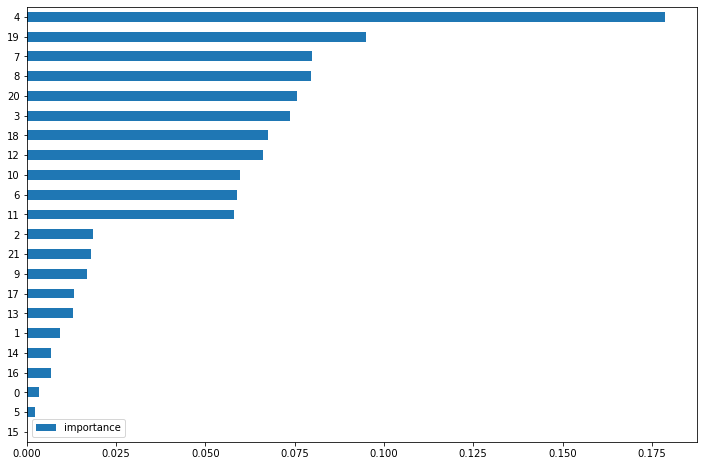

In [15]:
fi.sort_values('importance').plot(kind='barh', figsize=(12, 8))

### Let's test model

In [16]:
test_df = pd.read_csv('testing_mush.csv')

In [20]:
X_test = test_df

In [21]:
predictions = best_gamp.predict(X_test)

In [22]:
predictions.sum()

976

In [24]:
y_test = pd.read_csv('testing_y_mush.csv')

In [25]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test, predictions)

In [31]:
from seaborn import heatmap

<AxesSubplot:>

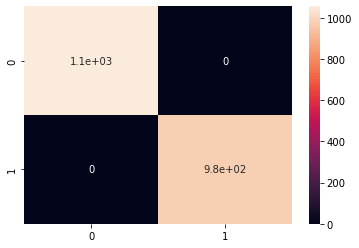

In [33]:
heatmap(cm, annot=True)